In [ ]:
#https://neo.gsfc.nasa.gov/view.php?datasetId=MYD28M

In [ ]:
pip install cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.1/223.1 KB 5.0 MB/s eta 0:00:00


In [ ]:
#imports
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [ ]:
ds_jan = xr.open_dataset('AQUA_MODIS.20220101_20220131.L3m.MO.SST.sst.9km.nc')
ds_july = xr.open_dataset('AQUA_MODIS.20220701_20220731.L3m.MO.SST.sst.9km.nc')

In [ ]:
ds_jan.attrs

{'product_name': 'AQUA_MODIS.20220101_20220131.L3m.MO.SST.sst.9km.nc',
 'instrument': 'MODIS',
 'title': 'MODISA Level-3 Standard Mapped Image',
 'project': 'Ocean Biology Processing Group (NASA/GSFC/OBPG)',
 'platform': 'Aqua',
 'temporal_range': 'month',
 'processing_version': 'R2019.0',
 'date_created': '2022-03-25T11:40:19.000Z',
 'history': 'l3mapgen par=AQUA_MODIS.20220101_20220131.L3m.MO.SST.sst.9km.nc.param ',
 'l2_flag_names': 'LAND,HISOLZEN',
 'time_coverage_start': '2022-01-01T00:15:00.000Z',
 'time_coverage_end': '2022-02-01T02:39:59.000Z',
 'start_orbit_number': 104585,
 'end_orbit_number': 105037,
 'map_projection': 'Equidistant Cylindrical',
 'latitude_units': 'degrees_north',
 'longitude_units': 'degrees_east',
 'northernmost_latitude': 90.0,
 'southernmost_latitude': -90.0,
 'westernmost_longitude': -180.0,
 'easternmost_longitude': 180.0,
 'geospatial_lat_max': 90.0,
 'geospatial_lat_min': -90.0,
 'geospatial_lon_max': 180.0,
 'geospatial_lon_min': -180.0,
 'latitude_

In [ ]:
ds_jan.data_vars

Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...

In [ ]:
ds_jan.variables

Frozen({'sst': <xarray.Variable (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0, 'qual_sst': <xarray.Variable (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Attributes:
    long_name:  Quality Levels, Sea Surface Temperature
    valid_min:  0
    valid_max:  5, 'lat': <xarray.IndexVariable 'lat' (lat: 2160)>
array([ 89.958336,  89.875   ,  89.791664, ..., -89.79167 , -89.87501 ,
       -89.958336], dtype=float32)
Attributes:
    long_name:      Latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0, 'lon': <xarray.IndexVariable 'lon' (lon: 4320)>
array([-179.95833, -179.875  , -179.79167, ...,  179.79167,  179.87502,
        179.95834], dtyp

In [ ]:
ds_jan.sst

<xarray.DataArray 'sst' (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0

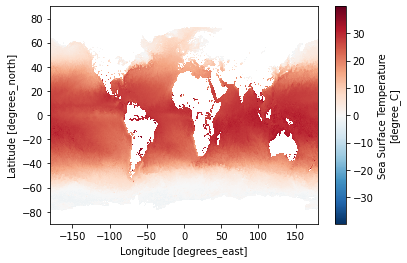

In [ ]:
ds_jan.sst.plot()

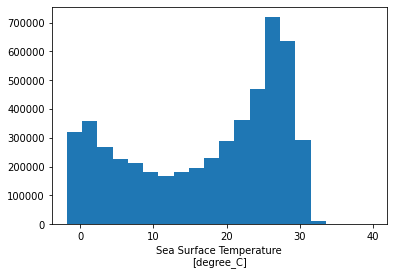

In [ ]:
xr.plot.hist(ds_jan.sst, bins=20);

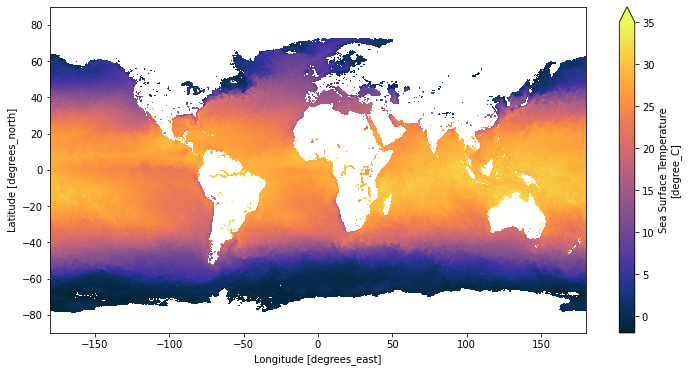

In [ ]:
ds_jan.sst.plot(figsize=(12,6), cmap=cmocean.cm.thermal, vmin=-2, vmax=35);

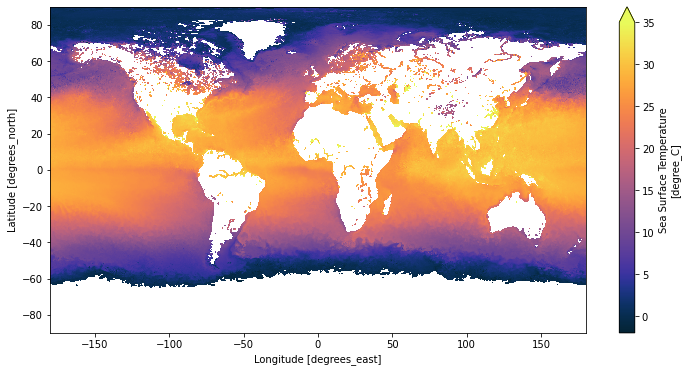

In [ ]:
ds_july.sst.plot(figsize=(12,6), cmap=cmocean.cm.thermal, vmin=-2, vmax=35);

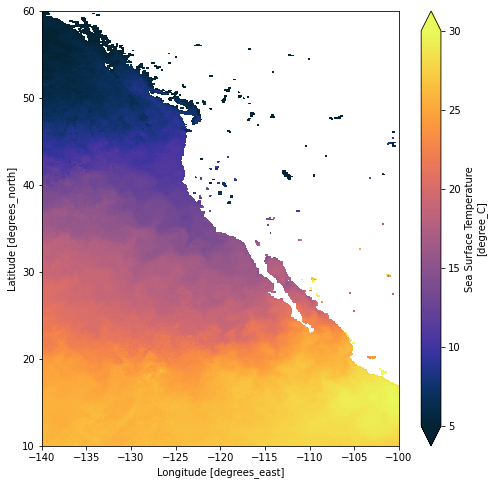

In [ ]:
ds_jan.sel(lat=slice(60,10), lon=slice(-140,-100)).sst.plot(figsize=(8,8),cmap=cmocean.cm.thermal,vmin=5, vmax=30);

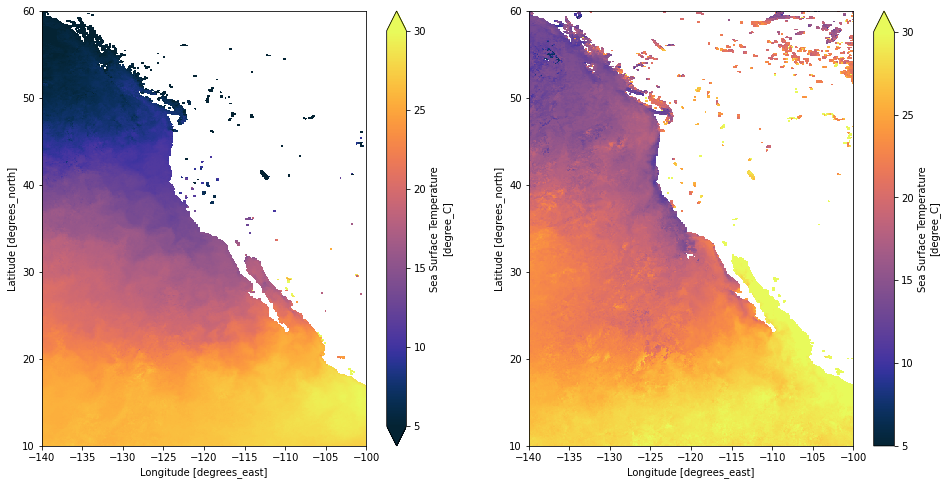

In [ ]:
#california coordinates
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
ds_jan.sel(lat=slice(60,10), lon=slice(-140,-100)).sst.plot(
                                                            cmap=cmocean.cm.thermal,vmin=5, vmax=30, ax=axs[0])
ds_july.sel(lat=slice(60,10), lon=slice(-140,-100)).sst.plot(
                                                            cmap=cmocean.cm.thermal,vmin=5, vmax=30, ax=axs[1]);

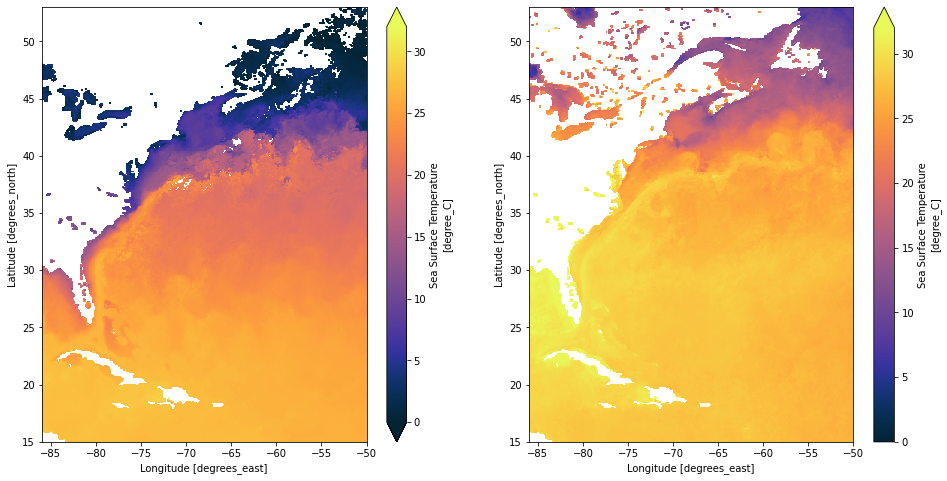

In [ ]:
# gulf stream coordinates
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
ds_jan.sel(lat=slice(53,15), lon=slice(-86,-50)).sst.plot(
                                                            cmap=cmocean.cm.thermal,vmin=0, vmax=32, ax=axs[0])
ds_july.sel(lat=slice(53,15), lon=slice(-86,-50)).sst.plot(
                                                            cmap=cmocean.cm.thermal,vmin=0, vmax=32, ax=axs[1]);